In [1]:
import easyocr
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
import pandas as pd 
import cv2
import os

c:\users\rahie\anaconda3\envs\tfod2\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [4]:
image_path = '1.jpg'

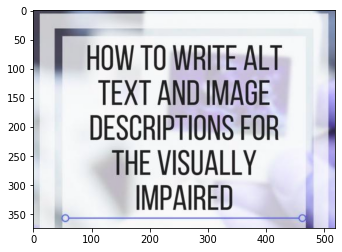

In [5]:
img = cv2.imread(image_path)
plt.imshow(img)

In [6]:
reader = easyocr.Reader(['en'],True)
result = reader.readtext(image_path)

c:\users\rahie\anaconda3\envs\tfod2\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [72]:
result

[([[85, 51], [437, 51], [437, 113], [85, 113]],
  'HOW TO WRITE AlT',
  0.7882892616878944),
 ([[105, 111], [417, 111], [417, 173], [105, 173]],
  'TEXT AND IMAGE',
  0.9289791709132912),
 ([[90, 170], [433, 170], [433, 234], [90, 234]],
  'DESCRIPTIONS FOR',
  0.9829486344258936),
 ([[129, 231], [391, 231], [391, 293], [129, 293]],
  'THE VISUALLY',
  0.8621342571016222),
 ([[168, 292], [352, 292], [352, 352], [168, 352]],
  'IMPAIRED',
  0.8022106758200537)]

In [21]:
result[0]

([[85, 51], [437, 51], [437, 113], [85, 113]],
 'HOW TO WRITE AlT',
 0.7736678410858976)

# Single detection

In [22]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [47]:
img = cv2.imread(image_path)
img = cv2.rectangle(img , top_left , bottom_right , (255,255,0),2)
img = cv2.putText(img, text, top_left , font, 1, (255 , 0 , 0))

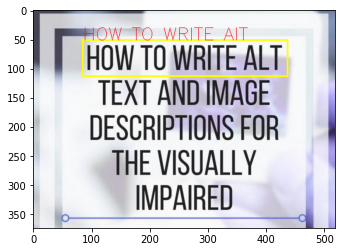

In [48]:
plt.imshow(img)

# To detect multiple words

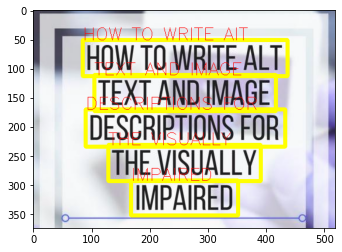

In [8]:
def detect(image_path) : 
    reader = easyocr.Reader(['en'],True)
    result = reader.readtext(image_path)
    img = cv2.imread(image_path)
    for i in result:
        top_left = tuple([int(val) for val in i[0][0]])
        bottom_right = tuple([int(val) for val in i[0][2]])
        text = i[1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img , top_left, bottom_right ,(255,255,0),5)
    #   top_left1 = [int(val)+10 for val in i[0][0]] (adjust the position of the text)
        img = cv2.putText(img , text , top_left , font , 1 , (255,0,0))
    plt.imshow(img)

detect('1.jpg')

# Detect multiple images from a folder 

Using CPU. Note: This module is much faster with a GPU.


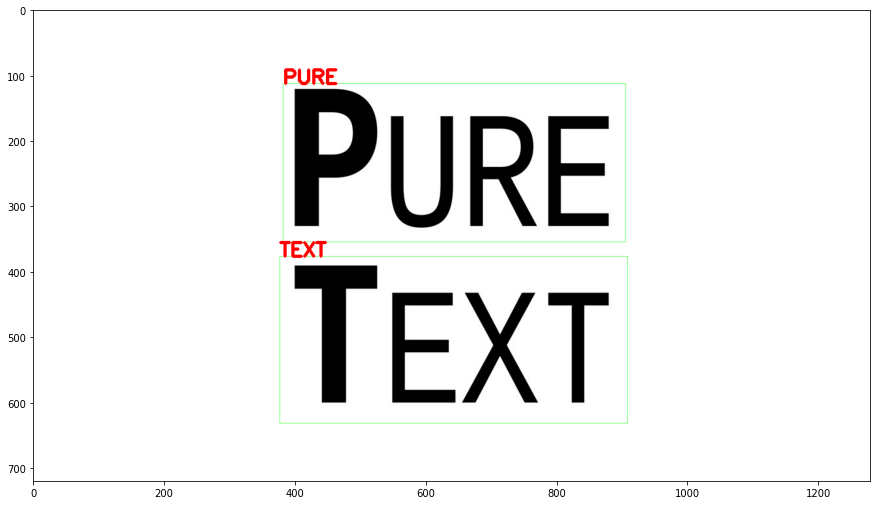

Using CPU. Note: This module is much faster with a GPU.


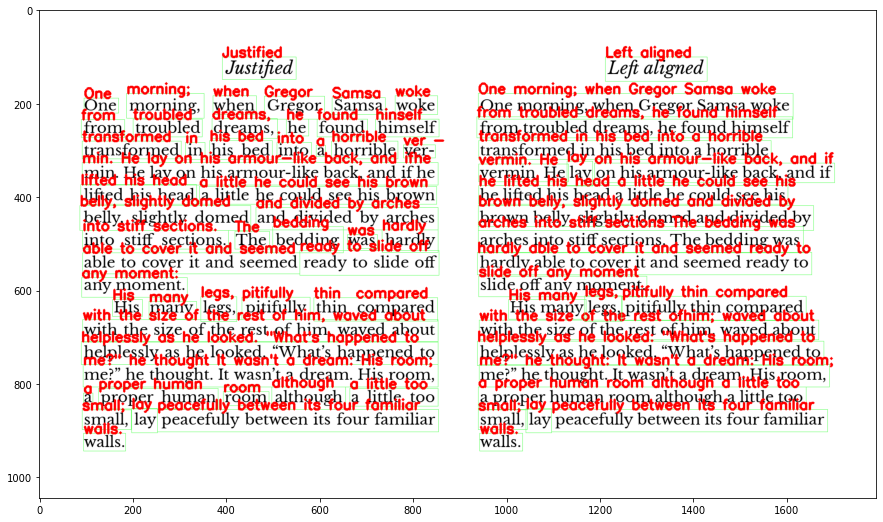

Using CPU. Note: This module is much faster with a GPU.


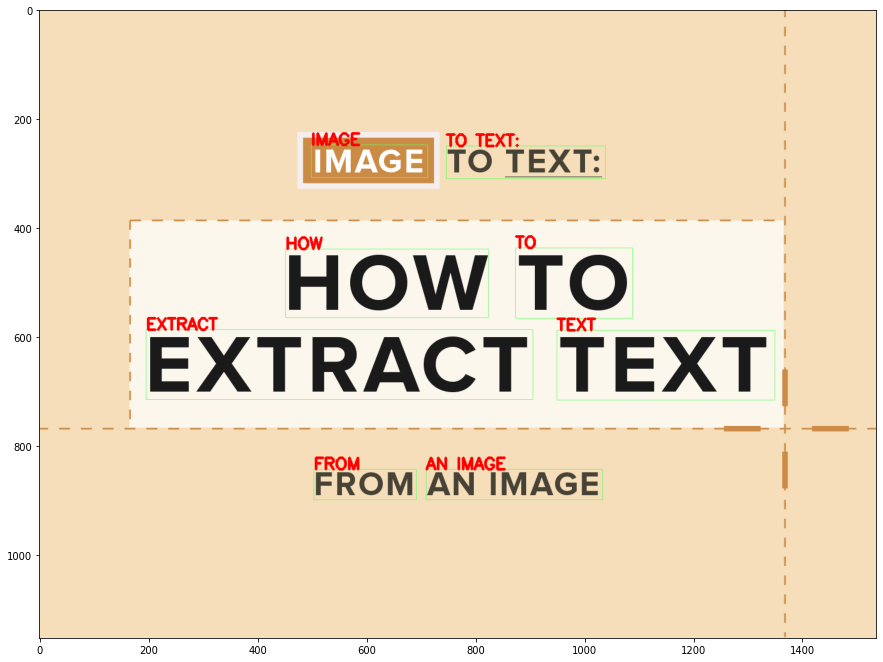

In [24]:
def detect_dir(dirpath) : 
    for image in os.listdir(dirpath): 
        reader = easyocr.Reader(['en'],False)
        result = reader.readtext(os.path.join(dirpath,image))
        img = cv2.imread(os.path.join(dirpath ,image))
        for i in result:
            top_left = tuple([int(val) for val in i[0][0]])
            bottom_right = tuple([int(val) for val in i[0][2]])
            text = i[1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            img = cv2.rectangle(img , top_left, bottom_right ,(100,255,100),1)
        #   top_left1 = [int(val)+10 for val in i[0][0]] (adjust the position of the text)
            img = cv2.putText(img , text , top_left , font , 1 , (255,0,0),cv2.LINE_4)
        plt.figure(figsize=(15,15))
        plt.imshow(img)
        plt.show()

detect_dir('images')